In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import re
import geopandas as gpd

%matplotlib inline
plt.rcParams.update({'font.size': 14})

# The Data

In [2]:
url = 'https://raw.githubusercontent.com/dtrihinas/covid-19-cyprus-data/master/coronavirus_cyprus_data.csv'
data = pd.read_csv(url, index_col='caseid')
data.head()

,date,gender,age,nationality,area,impact,profession,hospitalized,ICU,recovered,relation,notes
caseid,,,,,,,,,,,,
1,10/03/2020,M,25.0,cypriot,limassol,travel (italy),NaN,0,0,1,-1,NaN
2,10/03/2020,M,64.0,cypriot,nicosia,travel (uk),doctor,0,0,1,-1,NaN
3,11/03/2020,M,NaN,cypriot,nicosia,travel (uk),pensioner,1,0,1,-1,NaN
4,11/03/2020,F,NaN,cypriot,nicosia,travel (uk),NaN,1,0,1,-1,NaN
5,11/03/2020,F,NaN,greek,limassol,travel (italy),NaN,1,0,1,-1,NaN


# Daily Cases

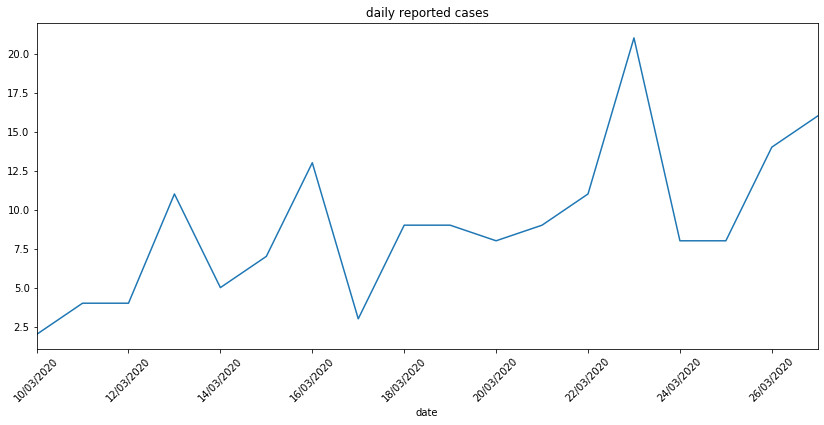

In [3]:
cum_cases = data.groupby('date').size()
cum_cases.plot(figsize=(14,6), title='daily reported cases', rot=45)

# Cumulative Distribution of Cases (TODO @elias)

In [4]:
#code

# Case Impact Type

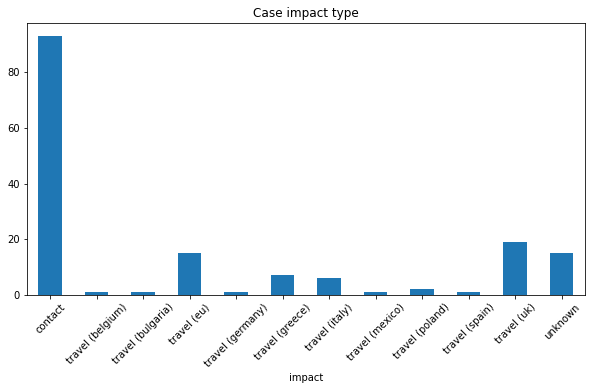

In [5]:
case_impact = data.groupby('impact').size()
case_impact.plot(kind='bar',x='impact',y='cases', title='Case impact type', rot=45, figsize=(10,5))

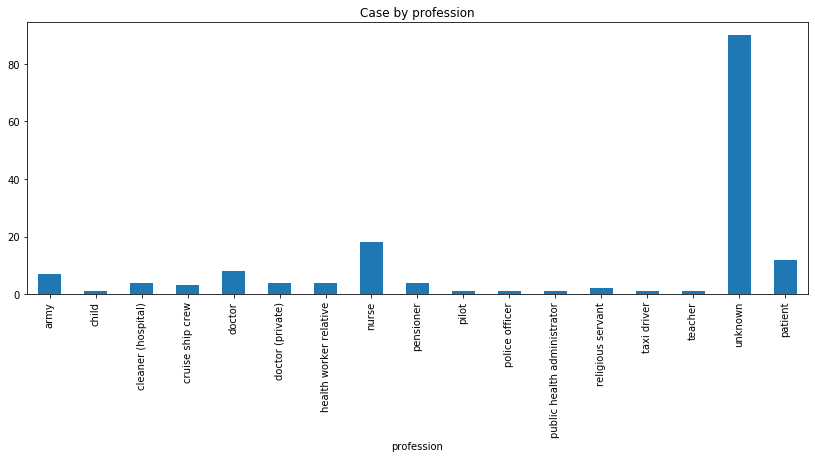

In [6]:
case_profession = data.groupby('profession').size()
unknown_prof = data.index.size - case_profession.sum()
case_profession['unknown'] = unknown_prof
patients = ~case_profession.index.str.extract(r'(^patient)').isna()[0].values #bool array matching patients
total_patient_count = case_profession[patients].sum() #merge patient count from different hospitals
case_profession[patients == True] = np.nan
case_profession = case_profession.dropna()
case_profession['patient'] = total_patient_count
case_profession.plot(kind='bar',x='profession',y='cases', title='Case by profession', rot=90, figsize=(14,5))

In [7]:
#Nice to see the above without unknown

# Case Geomapping

In [8]:
cyprus_geojson_url = "https://raw.githubusercontent.com/dtrihinas/cyprus-geojson/master/cyprus.geojson"
geodata = gpd.read_file(cyprus_geojson_url)
geodata['population'] = geodata['population'].apply(lambda x : np.nan if x == 'NA' else float(x))
geodata['district'] = geodata['district'].str.lower()
geodata = geodata.set_index('district')

geodata['covid19_cases'] = data.groupby('area').size()
geodata['covid19_cases'] = geodata['covid19_cases'].apply(lambda x : 0 if np.isnan(x) else x)
geodata

,population,area,geometry,covid19_cases
district,,,,
limassol,239842.0,1393.3,"POLYGON ((33.26712 34.73809, 33.27604 34.71791...",8.0
paphos,90295.0,1389.8,"POLYGON ((32.74372 34.93407, 32.67162 34.96390...",43.0
larnaca,145365.0,1120.1,"POLYGON ((33.12481 34.88480, 33.12653 34.85213...",15.0
nicosia,334120.0,2710.0,"POLYGON ((32.93495 35.26356, 32.89444 35.17212...",10.0
kerynia,NaN,643.89999999999998,"POLYGON ((33.54710 35.28318, 33.60168 35.31541...",0.0
famagusta,47338.0,1985.3,"POLYGON ((33.64700 35.35770, 33.64426 35.32521...",3.0
british overseas territory (akrotiri),NaN,NA,"POLYGON ((32.75574 34.65129, 32.83951 34.66710...",0.0
british overseas territory (dhekelia),NaN,NA,"POLYGON ((33.70605 34.97600, 33.74176 34.97825...",0.0


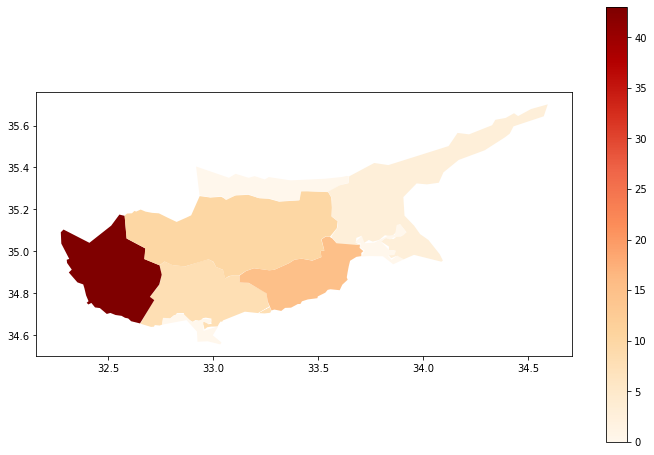

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geodata.plot(column="covid19_cases", ax=ax, legend=True, cmap='OrRd')

# Community Detection (TODO)

In [10]:
g = nx.DiGraph()
g.add_nodes_from(data.index.values)

r1 = re.compile(r'travel')
r2 = re.compile(r'\((.*?)\)')
impact_filter = np.vectorize(lambda x : bool(r1.search(x)))
country_selector = np.vectorize(lambda x : r2.search(x).group(1))
d = data['impact'].unique()
country_arr = country_selector(d[impact_filter(d)])
g.add_nodes_from(country_arr)
print(g.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 'italy', 'uk', 'greece', 'germany', 'belgium', 'bulgaria', 'spain', 'poland', 'mexico', 'eu']


In [11]:
def upd_edge_list(lst, tup):
    if isinstance(tup[1], float):
        pass #unknown contact connection
    elif tup[1] == '-1':
        if 'travel' in tup[2]:
            country = r2.search(tup[2]).group(1) 
            tup = (int(tup[0]), country) #travel cases link to country
        else:
            tup = (int(tup[0]), int(tup[0])) #unknown cases link to themselves
        lst.append(tup)
    elif '{' in tup[1]:
        x = re.findall(r'[0-9]+', tup[1]) 
        for i in x:
            lst.append((int(tup[0]), int(i))) #link to multiple cases
    else:
        lst.append((int(tup[0]),int(tup[1])))

elist = []

data.apply(lambda row : 
           upd_edge_list(elist, (row.name, row.relation, row.impact)), 
           axis=1)

elist

[(1, 'italy'),
 (2, 'uk'),
 (3, 'uk'),
 (4, 'uk'),
 (5, 'italy'),
 (6, 6),
 (7, 'uk'),
 (8, 'italy'),
 (9, 'greece'),
 (10, 'germany'),
 (11, 'greece'),
 (12, 'greece'),
 (13, 9),
 (14, 6),
 (15, 15),
 (16, 6),
 (17, 9),
 (18, 9),
 (19, 9),
 (20, 9),
 (21, 'uk'),
 (22, 'italy'),
 (23, 'italy'),
 (24, 9),
 (26, 26),
 (27, 'uk'),
 (28, 'uk'),
 (29, 'uk'),
 (30, 'uk'),
 (31, 'uk'),
 (32, 'uk'),
 (33, 'uk'),
 (34, 'uk'),
 (35, 'greece'),
 (36, 26),
 (37, 26),
 (38, 26),
 (39, 26),
 (40, 26),
 (40, 26),
 (42, 26),
 (43, 26),
 (44, 26),
 (45, 26),
 (46, 26),
 (47, 35),
 (48, 34),
 (49, 'belgium'),
 (50, 'greece'),
 (51, 'greece'),
 (52, 'greece'),
 (53, 26),
 (54, 51),
 (57, 'uk'),
 (59, 61),
 (60, 50),
 (60, 26),
 (61, 26),
 (62, 26),
 (63, 26),
 (65, 'italy'),
 (66, 'uk'),
 (67, 'bulgaria'),
 (70, 26),
 (71, 26),
 (72, 26),
 (73, 11),
 (73, 12),
 (79, 26),
 (80, 80),
 (81, 'uk'),
 (82, 'spain'),
 (83, 'poland'),
 (84, 'poland'),
 (85, 85),
 (86, 35),
 (87, 35),
 (88, 26),
 (89, 26),
 (90, 

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


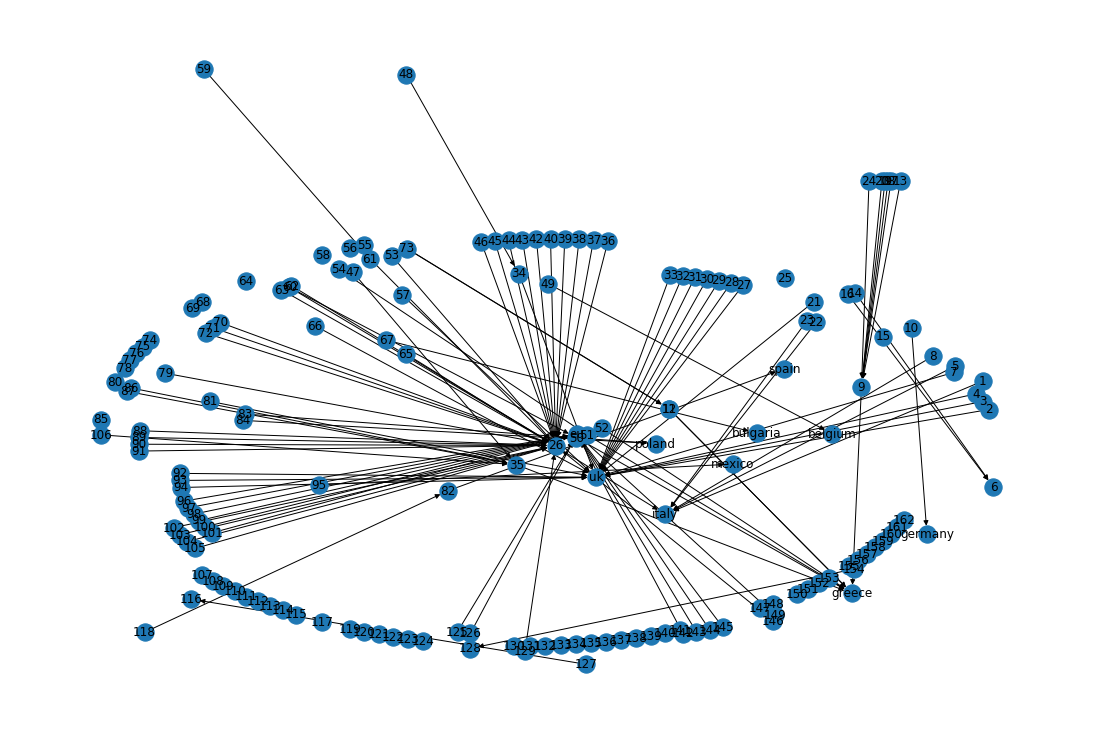

In [12]:
plt.figure(figsize=(15,10))
g.add_edges_from(elist)
nx.draw(g, with_labels = True, pos = nx.kamada_kawai_layout(g))